### Capstone Project 
### Perfumes Recommendation System 

#### Import Packages

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

#### Read Dataset:
- Perfumes Dataset: 
This dataset contain Perfumes data: Perfumes_Name, Brand, Describtion, Price, Gender, Product_type, Fragrance_Family, Character, Average Rate, Ingredients, Top, Middle and Base Notes, image_URL.

- Reviewa Dataset: 
This dataset contain User nickname, Perfume_name, Brand, Fragrance_Family, Overall_rating, User_rating, Revirews, Date.   

In [2]:
Perfumes_df = pd.read_csv("C:/Users/hmq4/OneDrive/Desktop/Data Science- Misk/chrome/Misk_DSI_Capstone_Project/Dataset/Datasets/Perfume_Dataset.csv")
Reviews_df = pd.read_csv("C:/Users/hmq4/OneDrive/Desktop/Data Science- Misk/chrome/Misk_DSI_Capstone_Project/Dataset/Datasets/Reviews_Dataset.csv")

#### Data Dictionary:
<table>
<tr>
<th> Column </th>
<th> Description </th>
</tr>

<tr>
    <td> Name </td>
    <td> Full name of the perfume </td>
</tr>


<tr>
    <td> Price </td>
    <td> The price is in SAR and it is an object type not a float </td>
</tr>  


<tr>
    <td> Description </td>
    <td> The description consist of a perfume description as well as a small description about the brand </td>
</tr>


<tr>
    <td> Rate </td>
    <td> This represent the average rating for the perfume by the users on a scale 0-5</td>
</tr>


<tr>
    <td> Rating_count </td>
    <td> This represent how many users have rated the perfume </td>
</tr>


<tr>
    <td> image </td>
    <td> This contain the image url of the perfume </td>
</tr>

<tr>
    <td> Brand </td>
    <td> The dataset contains 484 brands </td>
</tr>

<tr>
    <td> Gender </td>
    <td> The gender as Wonem, Men, Home, Unisex </td>
</tr>

<tr>
    <td> Product_Type </td>
    <td> This specify the product type such as perfume, perfume set, perfume oil, candle </td>
</tr>

<tr>
    <td> Character </td>
    <td> this specify a character for each perfume such as Romantic,Charismatic. </td>
</tr>

<tr>
    <td> Fragrance_Family </td>
    <td> This reperesent the class of the perfume such as floral, woody </td>
</tr>

<tr>
    <td> Size </td>
    <td> Most Perfume measured in ml, however the dataset contains other sizes: g </td>
</tr>

<tr>
    <td> Year </td>
    <td> This represent the year the perfume have lunched </td>
</tr>

<tr>
    <td> Ingredients </td>
    <td> This contain all the perfume Ingredients </td>
</tr>

<tr>
    <td> Concentration</td>
    <td> This represent how strong the perfume is such as Parfum which is the strongest </td>
</tr>

<tr>
    <td> Top_note </td>
    <td> The Top Note is the note Ingredients, this note is the light note </td>
</tr>

<tr>
    <td> Middle_note </td>
    <td> The Middle note is the core and very essence of the of the perfume</td>
</tr>

<tr>
    <td> Base_note </td>
    <td> The base notes of the perfume give it depth, richness (the foundation of the perfume)</td>
</tr>

</table>


### 1. Perfumes Dataset Cleaning 

Summary of the Cleaning step:
1. Remove duplicate
2. Change price datatype and remove SAR
3. Change Rate,Rating_count datatype to float 
4. Check all the columns values,so they don't have any wrong values >> resulted from web scraping
5. Remove the size from Name  
6. Handle null values 
7. A lot of manual cleaning to resolve inconsistency 

In [3]:
Perfumes_df.shape

(6237, 19)

In [4]:
# Checking for duplicate 
print(f"The DataFrame have {Perfumes_df.duplicated().sum()} duplicate")
# remove duplicate
Perfumes_df = Perfumes_df.drop_duplicates()

The DataFrame have 25 duplicate


In [5]:
Perfumes_df.shape

(6212, 19)

In [6]:
Perfumes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6212 entries, 0 to 6236
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              6212 non-null   object
 1   Price             6212 non-null   object
 2   Description       6103 non-null   object
 3   Rate              6103 non-null   object
 4   Rating_count      6098 non-null   object
 5   Details           6097 non-null   object
 6   image             6097 non-null   object
 7   Brand             5808 non-null   object
 8   Gender            5895 non-null   object
 9   Product_Type      5594 non-null   object
 10  Character         5347 non-null   object
 11  Fragrance_Family  5582 non-null   object
 12  Size              5571 non-null   object
 13  Year              4211 non-null   object
 14  Ingredients       5454 non-null   object
 15  Concentration     4855 non-null   object
 16  Top_note          5283 non-null   object
 17  Middle_note   

After manual cleaning I created a new csv file and copy the data to it, unfortunately the dataset size get reduced 

In [7]:
final_df = pd.read_csv("C:/Users/hmq4/OneDrive/Desktop/Data Science- Misk/chrome/Misk_DSI_Capstone_Project/Dataset/Datasets/Dataset.csv")

In [8]:
final_df.shape

(4239, 18)

In [9]:
# Checking for duplicate 
print(f"The DataFrame have {final_df.duplicated().sum()} duplicate")
# remove duplicate
final_df = final_df.drop_duplicates()

The DataFrame have 0 duplicate


In [10]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4239 entries, 0 to 4238
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              4239 non-null   object 
 1   Price             4239 non-null   object 
 2   Description       4239 non-null   object 
 3   Rate              4239 non-null   object 
 4   Rating_count      4239 non-null   object 
 5   image             4239 non-null   object 
 6   Brand             4239 non-null   object 
 7   Gender            4239 non-null   object 
 8   Product_Type      4239 non-null   object 
 9   Character_x       4239 non-null   object 
 10  Fragrance_Family  4219 non-null   object 
 11  Size              4238 non-null   object 
 12  Year              4218 non-null   float64
 13  Ingredients       4239 non-null   object 
 14  Concentration     4225 non-null   object 
 15  Top_note          4239 non-null   object 
 16  Middle_note       4233 non-null   object 


In [11]:
final_df.head()

,Name,Price,Description,Rate,Rating_count,image,Brand,Gender,Product_Type,Character_x,Fragrance_Family,Size,Year,Ingredients,Concentration,Top_note,Middle_note,Base_note
0,Dolce & Gabanna L'imperatrice 3 Pour Femme,199,Perfume for the energetic woman who is a hero ...,5,6 Rating,https://assets.goldenscent.com/catalog/product...,Dolce&Gabbana,Women,Perfume,Romantic,Floral,100 ml,2009.0,"Watermerlon, Kiwi, Pink Cyclamen, Musk, Pink P...",Eau de Toilette,"Pink pepper, kiwi, rhubarb","jasmine, cyclamen, watermelon","musk, sandalwood, lemon trees."
1,Roberto Cavalli Paradiso,169,"Woody floral fragrance, a subtle aroma that ma...",4.95,17 Rating,https://assets.goldenscent.com/catalog/product...,Roberto Cavalli,Women,Perfume,Romantic,Woody,50 ml,2015.0,"Citrus, mandarin, bergamot, jasmine, pine, cyp...",Eau de Parfum,"Citruses , Mandarin , Bergamot",Jasmine,"Cypress, Parasol pine, Pink laurel"
2,Yves Saint Laurent Libre,389,"This perfume is a reflection of Freedom, speci...",5,3 Rating,https://assets.goldenscent.com/catalog/product...,Yves Saint Laurent,Women,Perfume,Romantic,Floral,90 ml,2019.0,"Mandarin Orange, lavendar, black currant, peti...",Eau de Parfum,"Mandarin Orange, Lavendar, Black Currant, Peti...","Jasmine, Orange Blossom","Vanilla, Cedar, Musk, Ambergris"
3,Mancera Red Tobacco,499,"Mancera Red Tobacco is the new oriental, woody...",4.38,8 Rating,https://assets.goldenscent.com/catalog/product...,Mancera,Women,Perfume,Romantic,Oriental,120 ml,2017.0,"Saffron, Cinnamon, Incense, Nutmeg, White Peac...",Eau de Parfum,"Saffron, Cinnamon, Incense, Nutmeg, White peac...","Patchouli, Jasmine","Tobacco, Amber, Woody notes, Vetiver, Vanilla,..."
4,Giorgio Armani Emporio Armani Stronger With Yo...,399,"for every romantic gentle man, This strong fas...",5,3 Rating,https://assets.goldenscent.com/catalog/product...,Giorgio Armani,Men,Perfume,Romantic,Aromatic,100 ml,2019.0,"Spices, Violet, Lavender, Sweet Toffee, Carame...",Eau de Parfum,"Pink pepper, Juniper, Violet leaf","Lavender, Sage, Toffee, Cinnamon","Tonka bean, Suede, Amber, Vanilla"


In [12]:
final_df['Name'] = final_df.Name.str.split('-').str[0]
final_df['Name'] = final_df.Name.str.split('(').str[0]

In [13]:
# remove SAR from price column 
final_df['Price'] = final_df.Price.str.split(' ').str[0]

In [14]:
# converting price to numric value 
final_df.Price = pd.to_numeric(final_df.Price)

In [15]:
# removing "Rating" in Rating_count column
final_df['Rating_count'] = final_df.Rating_count.str.split(' ').str[0]

In Rating and Rating_cont columns "none" represent no rating, 0 lowest score and 5 highest score 
Thus, I will keep Rate and Rating_count as it is, so I can know if no rating which majority of the perfume have no rating

In [16]:
final_df.Rate.value_counts()

none    3832
5        299
4         34
4.5       22
3          9
3.5        5
1          5
4.75       5
4.25       4
4.6        4
4.83       4
4.67       3
3.67       3
4.88       2
4.95       1
4.8        1
4.79       1
4.38       1
4.42       1
4.93       1
4.89       1
4.92       1
Name: Rate, dtype: int64

### 2. EDA
Let's Discover the dataset scraped from Golden Scent Website 

In [17]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4239 entries, 0 to 4238
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              4239 non-null   object 
 1   Price             4239 non-null   int64  
 2   Description       4239 non-null   object 
 3   Rate              4239 non-null   object 
 4   Rating_count      4239 non-null   object 
 5   image             4239 non-null   object 
 6   Brand             4239 non-null   object 
 7   Gender            4239 non-null   object 
 8   Product_Type      4239 non-null   object 
 9   Character_x       4239 non-null   object 
 10  Fragrance_Family  4219 non-null   object 
 11  Size              4238 non-null   object 
 12  Year              4218 non-null   float64
 13  Ingredients       4239 non-null   object 
 14  Concentration     4225 non-null   object 
 15  Top_note          4239 non-null   object 
 16  Middle_note       4233 non-null   object 


In [18]:
print(f'This dataset contains: {final_df.shape}')

This dataset contains: (4239, 18)


##### How many Brand in the Dataset?

In [19]:
print(f'This dataset contain: {final_df.Brand.nunique()}')

This dataset contain: 385


In [20]:
top_brand = final_df.groupby('Brand').agg({'Price':'max'}).sort_values(by=['Price'], ascending=False)
top_brand.head()

,Price
Brand,
Bvlgari,8193
Creed,6285
Xerjoff,5750
Boadicea,3763
Roja,3260


##### What the Perfumes Price range in Dataset?

In [21]:
print(f'Highest Price : {final_df.Price.max()},   Lowest Price : {final_df.Price.min()}')

Highest Price : 8193,   Lowest Price : 18


In [22]:
final_df.Price.value_counts()

119     120
295     108
99       53
199      48
240      38
       ... 
471       1
1192      1
621       1
526       1
2362      1
Name: Price, Length: 876, dtype: int64

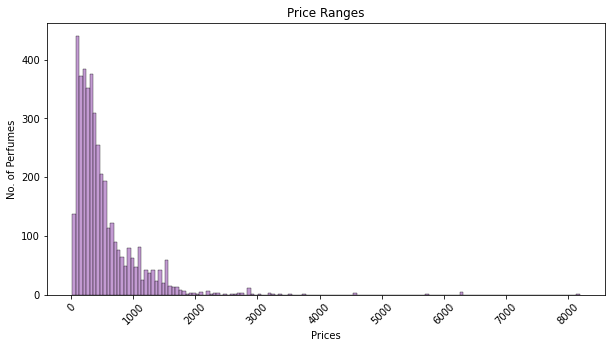

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns 
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
sns.histplot(final_df.Price, color ='#AF7AC5')
 
plt.xlabel("Prices")
plt.ylabel("No. of Perfumes")
plt.title("Price Ranges")
plt.xticks(rotation=45)
plt.show()

As the plot shows the majority of perfumes prices are below 1000 SAR and we get less and less as the price get higher   

#### How many perfumes have Rate values and what the Rating distribution?

In [24]:
final_df.Rate.value_counts()

none    3832
5        299
4         34
4.5       22
3          9
3.5        5
1          5
4.75       5
4.25       4
4.6        4
4.83       4
4.67       3
3.67       3
4.88       2
4.95       1
4.8        1
4.79       1
4.38       1
4.42       1
4.93       1
4.89       1
4.92       1
Name: Rate, dtype: int64

In [25]:
final_df.Rating_count.value_counts()

none    3832
1        248
2         83
3         38
4         17
5          8
7          4
6          3
8          2
17         1
12         1
18         1
13         1
Name: Rating_count, dtype: int64

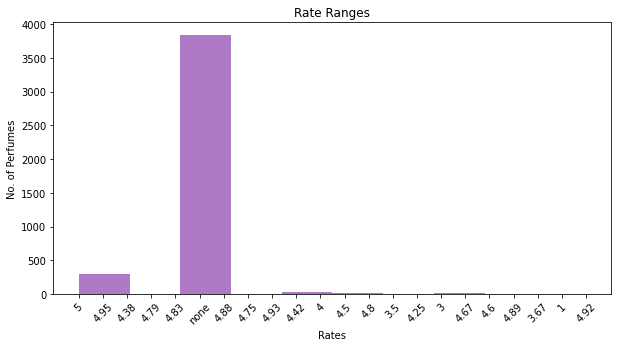

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns 
fig = plt.figure(figsize = (10, 5))
sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
# creating the bar plot
plt.hist(final_df.Rate, color ='#AF7AC5')
 
plt.xlabel("Rates")
plt.ylabel("No. of Perfumes")
plt.title("Rate Ranges")
plt.xticks(rotation=45)
plt.show()

As shown above I don't have a lot of rating data, thus Iam going to choose a content-based model that focuses on perfume features 

#### What the format of the Description column? 

In [27]:
final_df.Description.value_counts()

Unknown                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [28]:
pd.set_option("display.max_colwidth", -1)
final_df.Description.head(1)

C:\Users\hmq4\AppData\Local\Temp\ipykernel_8864\4272716560.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


0    Perfume for the energetic woman who is a hero in her movie in life every day! It keeps you vibrant and sparkling with irresistible attractiveness, a combination of kiwi, lemon and sandalwood.\nAbout the brand:\nDolce & Gabbana was established in 1985 by two Italian fashion designers. Dolce & Gabbana has not only managed to build a loyal customer base in such a short span of time but it also partnered with Motorola and Sony Ericson for multiple campaigns. D&G has also partnered with football clubs namely AC Milan and Chelsea FC.
Name: Description, dtype: object

As shown above Description is not unique for all perfume, some brand provide static description for all there perfume and specify perfume features in the following data. 
In addition, Descriptions are a bit long and contains "About Brand:" section which is not our goal,and will be repeated in all perfumes from a specific brand >> thus I will substract about brand part from the description. 

In [29]:
final_df['Description'] = final_df['Description'].str.split("\nAbout the brand:\n").str[0]
pd.set_option("display.max_colwidth", -1)
final_df.Description.head(1)

C:\Users\hmq4\AppData\Local\Temp\ipykernel_8864\2844140122.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


0    Perfume for the energetic woman who is a hero in her movie in life every day! It keeps you vibrant and sparkling with irresistible attractiveness, a combination of kiwi, lemon and sandalwood.
Name: Description, dtype: object

#### What perfume Sizes included in the dataset and what is the measures?

In [30]:
final_df.Size.value_counts()

100 ml     2233
50 ml      685 
75 ml      259 
55 ml      147 
125 ml     117 
          ...  
251 ml     1   
18 ml      1   
75ml       1   
100 g      1   
100 ml     1   
Name: Size, Length: 73, dtype: int64

The majority is measured in ml, however we have grams as well 

#### What are the gender in the dataset and what is the distribution for each?

In [31]:
final_df.Gender.value_counts()

Women     2167
Unisex    1095
Men       862 
Home      115 
Name: Gender, dtype: int64

#### What the percentage of each gender in the dataset?

In [32]:
total = len(final_df.index)
women = (len(final_df[final_df['Gender'] == 'Women'].index)/total)*100
men = (len(final_df[final_df['Gender'] == 'Men'].index)/total)*100
home = (len(final_df[final_df['Gender'] == 'Home'].index)/total)*100
unisex = (len(final_df[final_df['Gender'] == 'Unisex'].index)/total)*100

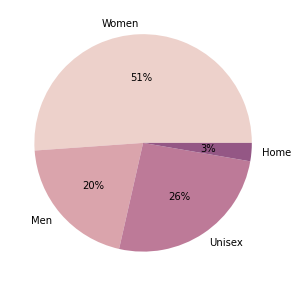

In [33]:
colors = sns.cubehelix_palette()[0:5]
fig = plt.figure(figsize = (10, 5))
data = [women, men, unisex, home]
labels = ['Women', 'Men', 'Unisex', 'Home']

fig.patch.set_facecolor('white')
#create pie chart
plt.pie(data, labels= labels , colors = colors, autopct='%.0f%%')
plt.show()

#### What product type included in the dataset ? 

In [34]:
print(f'This dataset consist of : {final_df.Product_Type.nunique()} different product type')

This dataset consist of : 15 different product type


In [35]:
final_df.Product_Type.value_counts()

Perfume               3530
Perfume Set           357 
Perfume Oil           72  
Room Spray            62  
Hair Mist             62  
Body Mist             43  
Bakhoor               36  
Oud                   28  
Hair & Body Mist      15  
Diffuser              15  
Candle                8   
Bundles               5   
Body Lotion           4   
Perfume               1   
Home Fragrance Set    1   
Name: Product_Type, dtype: int64

Note: This Product types are after cleaning, before I found some product type that should be excluded like makeup, shower gel, Deodorant

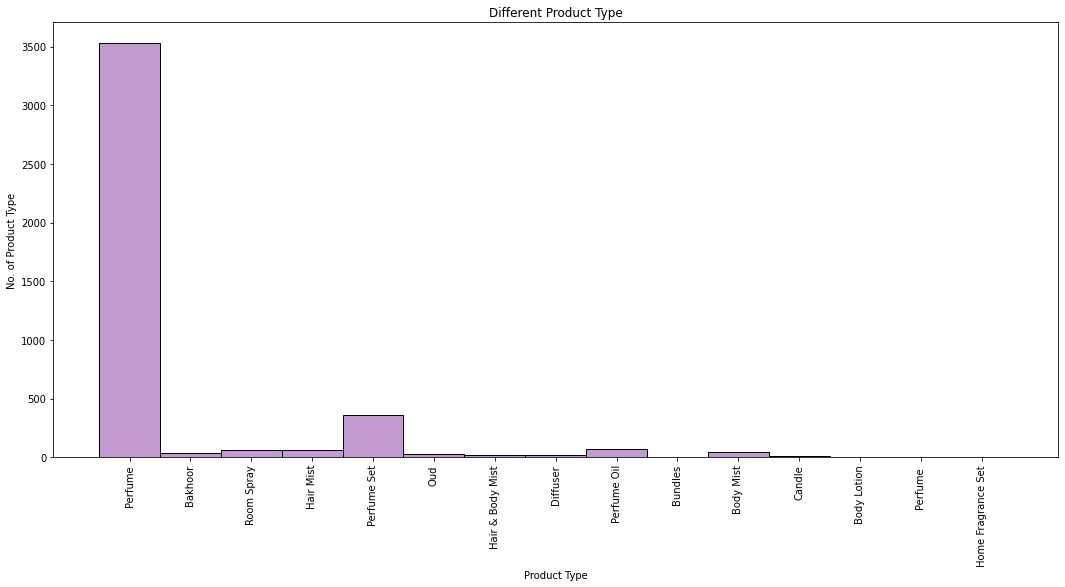

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns 
fig = plt.figure(figsize = (18, 8))
# creating the bar plot
#sns.histplot(final_df.Product_Type, color='final_df.Product_Type')
colors = sns.cubehelix_palette()
sns.histplot(final_df, x="Product_Type", color="#AF7AC5")
plt.xlabel("Product Type")
plt.ylabel("No. of Product Type")
plt.title("Different Product Type")
plt.xticks(rotation=90)
plt.show()

As Shown in the plot Perfumes have the majority as expected  

#### How many fragrance family and which one have the highest count in the dataset? 

In [37]:
print(f'This dataset consist of : {final_df.Fragrance_Family.nunique()} different product type')
print(f'They are : {final_df.Fragrance_Family.unique()}')

This dataset consist of : 21 different product type
They are : ['Floral' 'Woody' 'Oriental' 'Aromatic' 'Fruity' 'Floral Oriental' 'Oud'
 'Soft Oriental' 'Woody Oriental' 'Citrus' 'Sweet' 'Aquatic' 'Soft Floral'
 'Leather' nan 'Arabian' 'Chypre' 'Floral ' 'Woody,Woody' 'Floral,Fruity'
 'Floral,Woody' 'Aromatic,Oriental']


As above there is families that is repeated twice such as "Woody,Woody" that represent Woody family, so I will change it.
That also will reduce the fragrance family

In [38]:
final_df.Fragrance_Family.replace("Woody,Woody", "Woody", inplace=True)

In [39]:
print(f'This dataset consist of : {final_df.Fragrance_Family.nunique()} different product type')
print(f'They are : {final_df.Fragrance_Family.unique()}')

This dataset consist of : 20 different product type
They are : ['Floral' 'Woody' 'Oriental' 'Aromatic' 'Fruity' 'Floral Oriental' 'Oud'
 'Soft Oriental' 'Woody Oriental' 'Citrus' 'Sweet' 'Aquatic' 'Soft Floral'
 'Leather' nan 'Arabian' 'Chypre' 'Floral ' 'Floral,Fruity' 'Floral,Woody'
 'Aromatic,Oriental']


In [40]:
final_df.Fragrance_Family.value_counts()

Floral               1246
Oriental             678 
Woody                594 
Aromatic             402 
Fruity               332 
Citrus               292 
Floral Oriental      196 
Woody Oriental       133 
Leather              89  
Oud                  84  
Soft Floral          55  
Aquatic              51  
Soft Oriental        28  
Arabian              22  
Chypre               7   
Sweet                3   
Floral               2   
Floral,Fruity        2   
Floral,Woody         2   
Aromatic,Oriental    1   
Name: Fragrance_Family, dtype: int64

In [41]:
# Is there a relation between fragrance family and price? top five most expensive fragrance family
top_family = final_df.groupby("Fragrance_Family").agg({'Price' :"mean"}).sort_values(by = "Price", ascending=False)
top_family.head()

,Price
Fragrance_Family,
Chypre,881.428571
Woody Oriental,719.368421
Leather,686.741573
Floral,680.000000
Woody,649.311448


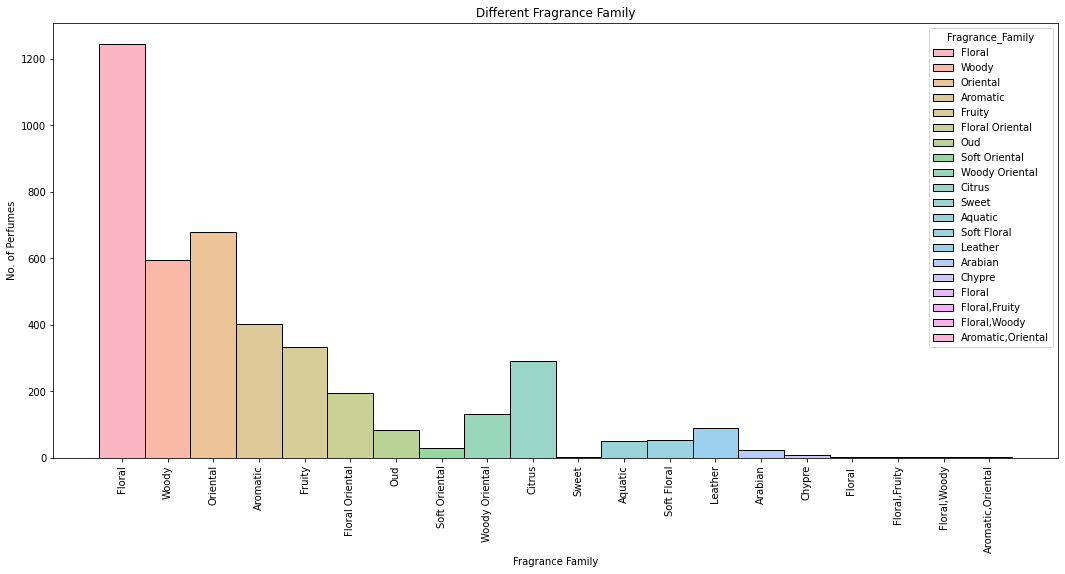

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns 
fig = plt.figure(figsize = (18, 8))

# creating the bar plot
sns.histplot(final_df,x="Fragrance_Family",  hue ='Fragrance_Family')
 
plt.xlabel("Fragrance Family")
plt.ylabel("No. of Perfumes")
plt.title("Different Fragrance Family")
plt.xticks(rotation=90)
plt.show()

Floral family is the highest 

#### How many Character in the dataset?

In [43]:
print(f'This dataset consist of : {final_df.Character_x.nunique()} different product type')
print(f'They are : {final_df.Character_x.unique()}')


This dataset consist of : 15 different product type
They are : ['Romantic' 'Sophisticated' 'Feminine' 'Charismatic' 'Masculine'
 'Extravagant' 'Dynamic' 'Fresh' 'Glamorous' 'Classical' 'Natural'
 'Sensual' 'Modern' 'Woody' 'natural']


Fresh is not a character, so i will replace it with Natural which is more approriate, as well as natural with lowercase "N" 

In [44]:
final_df.Character_x.replace("Fresh", "Natural", inplace=True)
final_df.Character_x.replace("natural", "Natural", inplace=True)
final_df.Character_x.replace("Woody", "Natural", inplace=True)

In [45]:
final_df.Character_x.value_counts()

Romantic         2086
Charismatic      513 
Natural          314 
Extravagant      279 
Feminine         276 
Dynamic          186 
Sensual          171 
Sophisticated    133 
Glamorous        110 
Classical        92  
Masculine        50  
Modern           29  
Name: Character_x, dtype: int64

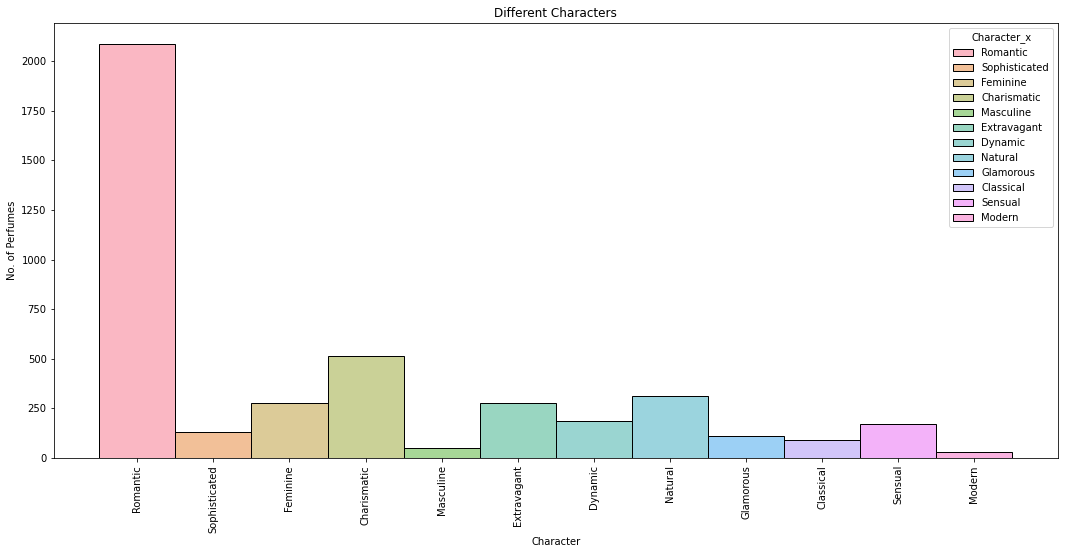

In [46]:
fig = plt.figure(figsize = (18, 8))

# creating the bar plot
sns.histplot(final_df,x="Character_x",  hue ='Character_x')
 
plt.xlabel("Character")
plt.ylabel("No. of Perfumes")
plt.title("Different Characters")
plt.xticks(rotation=90)
plt.show()

#### How ingredents are presented in the dataset?

In [47]:
final_df.Ingredients.head(5)

0    Watermerlon, Kiwi, Pink Cyclamen, Musk, Pink Pepper, Jasmine, Sandalwood, Lemon Tree                                                                                                        
1    Citrus, mandarin, bergamot, jasmine, pine, cypress, laurel.                                                                                                                                 
2    Mandarin Orange, lavendar, black currant, petitgrain, jasmine, orange blossom, vanilla, cedar, musk, ambergris                                                                              
3    Saffron, Cinnamon, Incense, Nutmeg, White Peach, Green Apple & Nepalese Oud, Leaves of Patchouli, delicate Jasmine, Precious Tobacco, Amber, Woody Notes, Vetiver, Vanilla Pods, White Musk.
4    Spices, Violet, Lavender, Sweet Toffee, Caramel, Cinnamon, Suede, Vanilla, Amber                                                                                                            
Name: Ingredients, dtype: obje

As shown above Ingredents are listed with a comma in between words. Somthing to notice here is the Capitalization some words are in camelcase some in lowercase. Thus, I will transfer all to a lowercase so I don't run into this issue during the recommendations. 

In [48]:
# convert to a lowercase
final_df['Ingredients'] = final_df["Ingredients"].str.lower()

In [49]:
final_df.Ingredients.head()

0    watermerlon, kiwi, pink cyclamen, musk, pink pepper, jasmine, sandalwood, lemon tree                                                                                                        
1    citrus, mandarin, bergamot, jasmine, pine, cypress, laurel.                                                                                                                                 
2    mandarin orange, lavendar, black currant, petitgrain, jasmine, orange blossom, vanilla, cedar, musk, ambergris                                                                              
3    saffron, cinnamon, incense, nutmeg, white peach, green apple & nepalese oud, leaves of patchouli, delicate jasmine, precious tobacco, amber, woody notes, vetiver, vanilla pods, white musk.
4    spices, violet, lavender, sweet toffee, caramel, cinnamon, suede, vanilla, amber                                                                                                            
Name: Ingredients, dtype: obje

In [50]:
# converting Top_note, Middle_note and Base_note to lowercase 
final_df['Top_note'] = final_df["Top_note"].str.lower()
final_df['Middle_note'] = final_df["Middle_note"].str.lower()
final_df['Base_note'] = final_df["Base_note"].str.lower()

##### What are the Concentrations in the dataset?

In [51]:
print(f'{final_df.Concentration.nunique()} concentration levels in the dataset')
print(f'{final_df.Concentration.value_counts()}')

11 concentration levels in the dataset
Eau de Parfum            3085
Eau de Toilette          829 
Eau de Cologne           109 
Perfume Oil              70  
Extrait de Parfum        62  
Unknown                  49  
Parfum                   13  
Eau de Parfum Intense    3   
Eau de Parfum            2   
Eau de Soin              2   
Eau Fraiche              1   
Name: Concentration, dtype: int64


#### Is there a relationship between Concentration and perfume price ?

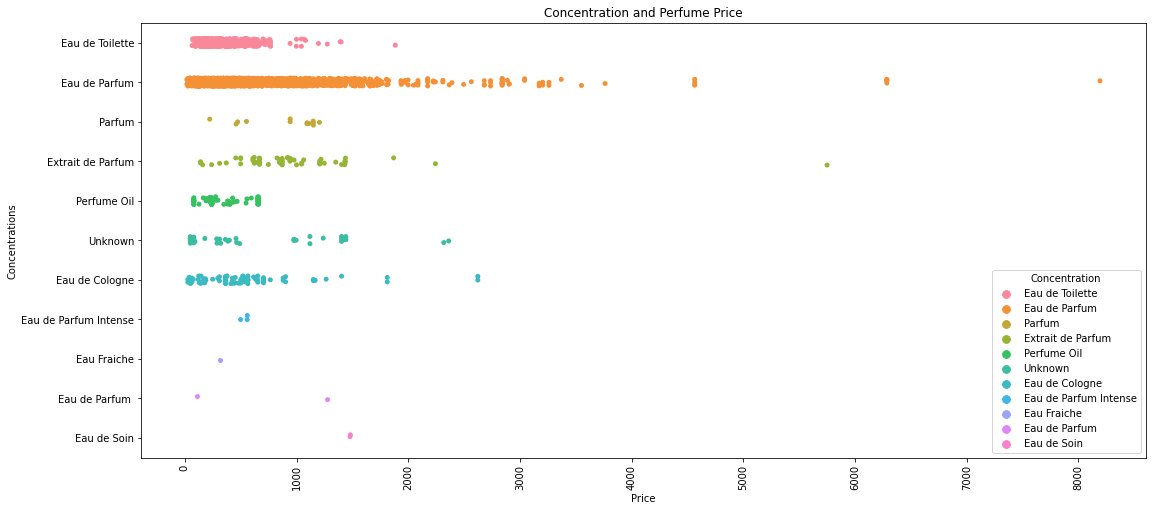

In [52]:
fig = plt.figure(figsize = (18, 8))

# creating the bar plot
sns.stripplot(y="Concentration", x="Price",
             hue="Concentration",
             data=final_df)
 
plt.xlabel("Price")
plt.ylabel("Concentrations")
plt.title("Concentration and Perfume Price")
plt.xticks(rotation=90)
plt.show()

From the plot above we can say that Concentration have no relationship with the price, because "Eau de Parfum" and "Parfum" which are the strongests concentration in Perfumes have middle price range with only 3 outliers that could be cause be another factor like the brand of the perfume. 

#### What are the Years are in the dataset, Are the Perfumes new, or old? 

In [53]:
final_df.Year.unique()

array([2009., 2015., 2019., 2017., 2014., 2016., 2012., 2008., 2020.,
       2004., 2018., 2013., 2000., 2006., 2021., 2007., 2003., 2002.,
       2011., 2010., 1995., 1996., 1998., 2005., 1999., 1990., 1913.,
       1988., 1934., 1997., 2001., 1994., 1991., 1993., 1984., 1981.,
       1983., 1986., 1987., 1966., 1992., 1792., 1989., 1971., 1930.,
       1969., 1920., 1962., 1978., 1976., 1985., 1974., 1955.,   nan,
       1959., 1925., 1980., 1927., 1973., 1972., 1890.])

The dataset contains Perfumes from 1890-2021 which is Great 

#### Handling Missing Values 

In [54]:
final_df.isnull().sum()

Name                0 
Price               0 
Description         0 
Rate                0 
Rating_count        0 
image               0 
Brand               0 
Gender              0 
Product_Type        0 
Character_x         0 
Fragrance_Family    20
Size                1 
Year                21
Ingredients         0 
Concentration       14
Top_note            0 
Middle_note         6 
Base_note           15
dtype: int64

- Filling missing values:
1. Fragrance Family: This column is based on the perfume it self, I will replace NaNs based on the top ingreadents that usually classifies perfumes to different families. 
Resource: https://www.scentstore.com/about/perfume-explained/#:~:text=The%20fragrance%20concentration%20of%20a,of%20the%20fragrance%20is%20greater
2. Size: This column could be filled in with mode: 100 ml
3. Year: from the dataset we can noticed that a lot of perfumes are lanuched in 2017, thus I will fill NaNs with 2017
4. Concentration: This beased on the amout of the alcohol and perfume oils, which isn't specified in any other column,  thus I will replace with "Unknown" 
5. Middle_note: This column is based on the perfume itself, also not all perfumes have 3 notes such as simple perumes could be only created by a top note, so can't be fill in using mode or knnimputer, thus I will fill in with "Unknown" 
6. Base_note: This column is based on the perfume itself, thus I will fill in with "Unknown" 

In [55]:
# Unknown 
final_df.Concentration.fillna("Unknown", inplace=True)
final_df.Middle_note.fillna("Unknown", inplace=True)
final_df.Base_note.fillna("Unknown", inplace=True)

In [56]:
# mode 
final_df.Year.fillna(final_df['Year'].mode()[0], inplace=True)
final_df.Size.fillna(final_df['Size'].mode()[0], inplace=True)

In [57]:
final_df.loc[(final_df['Fragrance_Family'].isnull()) & (final_df['Ingredients'].str.contains("musk")), 'Fragrance_Family'] = 'Oriental'  
final_df.loc[(final_df['Fragrance_Family'].isnull()) & (final_df['Ingredients'].str.contains("grapefruit")), 'Fragrance_Family'] = 'Citrus'  
final_df.loc[(final_df['Fragrance_Family'].isnull()) & (final_df['Ingredients'].str.contains("leather")), 'Fragrance_Family'] = 'Woody'  
final_df.loc[(final_df['Fragrance_Family'].isnull()) & (final_df['Ingredients'].str.contains("rose")), 'Fragrance_Family'] = 'Floral'  
final_df.loc[(final_df['Fragrance_Family'].isnull()) & (final_df['Ingredients'].str.contains("lavender")), 'Fragrance_Family'] = 'Aromatic'  

In [58]:
final_df.loc[(final_df['Fragrance_Family'].isnull()) & (final_df['Ingredients'].str.contains("patchouli")), 'Fragrance_Family'] = 'Oriental' 
final_df.loc[(final_df['Fragrance_Family'].isnull()) & (final_df['Ingredients'].str.contains("sandelwood")), 'Fragrance_Family'] = 'Oriental'
final_df.loc[(final_df['Fragrance_Family'].isnull()) & (final_df['Ingredients'].str.contains("perpper")), 'Fragrance_Family'] = 'Floral'
final_df.loc[(final_df['Fragrance_Family'].isnull()) & (final_df['Ingredients'].str.contains("iris")), 'Fragrance_Family'] = 'Floral'
final_df.loc[(final_df['Fragrance_Family'].isnull()) & (final_df['Ingredients'].str.contains("vanilla")), 'Fragrance_Family'] = 'Floral'
final_df.loc[(final_df['Fragrance_Family'].isnull()) & (final_df['Ingredients'].str.contains("jasmine")), 'Fragrance_Family'] = 'Floral'
final_df.loc[(final_df['Fragrance_Family'].isnull()) & (final_df['Ingredients'].str.contains("lemon")), 'Fragrance_Family'] = 'Citrus'
final_df.loc[(final_df['Fragrance_Family'].isnull()) & (final_df['Ingredients'].str.contains("orange")), 'Fragrance_Family'] = 'Citrus'


In [59]:
final_df.loc[(final_df['Fragrance_Family'].isnull()) & (final_df['Ingredients'].str.contains("amber")), 'Fragrance_Family'] = 'Oriental'
final_df.loc[(final_df['Fragrance_Family'].isnull()) & (final_df['Ingredients'].str.contains("oakmoss")), 'Fragrance_Family'] = 'Woody'
final_df.loc[(final_df['Fragrance_Family'].isnull()) & (final_df['Ingredients'].str.contains("tobaco")), 'Fragrance_Family'] = 'Woody'
final_df.loc[(final_df['Fragrance_Family'].isnull()) & (final_df['Ingredients'].str.contains("cedar")), 'Fragrance_Family'] = 'Woody'
final_df.loc[(final_df['Fragrance_Family'].isnull()) & (final_df['Ingredients'].str.contains("flowers")), 'Fragrance_Family'] = 'Floral'
final_df.loc[(final_df['Fragrance_Family'].isnull()) & (final_df['Top_note'].str.contains("flowers")), 'Fragrance_Family'] = 'Floral'

In [61]:
#final_df.to_csv("final_df.csv")